## Before/After
This is a script where one compare the block distribution before and afte the merging

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
## First load the Data:
ibd_folder_raw = "../Data/IBD_raw/"
ibd_folder_pp = "../Data/IBD_merged/"
file_raw = "CBchrMAF01.ibd25.ibd"
file_pp = "CBchrMAF01.ibd25.postprocessed.ibd"


# Load the old Data
df_raw = pd.read_csv(ibd_folder_raw + file_raw, sep="\t", header=None)  
columns = ["Ind1", "HapIndex1", "Ind2", "HapIndex2","Scaffold", "IBDStart", "IBDEnd", "Lod", "IBDlen"] 
df_raw.columns = columns

# Load the new Data:
df_pp = pd.read_csv(ibd_folder_pp + file_pp, sep=",")
df_pp = df_pp[columns]
print("Successfully loaded")

Successfully loaded


In [25]:
print("Longer than (Old/New)")
print("All: %i / %i" % (len(df_raw),len(df_pp)))
print("500 kb: %i / %i" % (np.sum(df_raw["IBDlen"]>5e5), np.sum(df_pp["IBDlen"]>5e5)))
print("1 mb: %i / %i" % (np.sum(df_raw["IBDlen"]>1e6), np.sum(df_pp["IBDlen"]>1e6)))
print("5 mb: %i / %i" % (np.sum(df_raw["IBDlen"]>2e6), np.sum(df_pp["IBDlen"]>2e6)))
print("10 mb: %i / %i" % (np.sum(df_raw["IBDlen"]>10e6), np.sum(df_pp["IBDlen"]>10e6)))
print("20 mb: %i / %i" % (np.sum(df_raw["IBDlen"]>20e6), np.sum(df_pp["IBDlen"]>20e6)))
#print("Nr of Blocks > 500 kb: %i " % len(ibd_data[ibd_data.IBDlen>500000]))
#print("Nr of Blocks > 1 mb: %i " % len(ibd_data[ibd_data.IBDlen>1000000]))

Longer than (Old/New)
All: 120074 / 25085
500 kb: 10479 / 8485
1 mb: 1193 / 5989
5 mb: 177 / 4682
10 mb: 0 / 1724
20 mb: 0 / 319


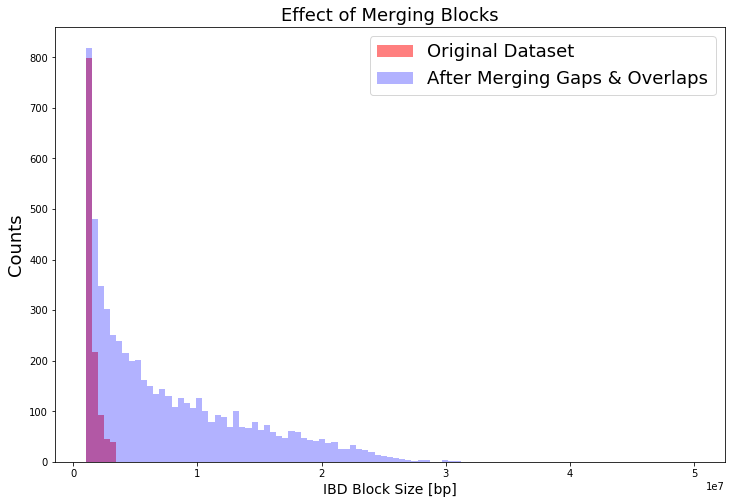

In [26]:
###
# Plot the distribution of the top blocks
# Extract Blocks longer than threshold
threshold=1.0e6   # 1 mb
upper_plot=50e6  # 7 mb
nr_bins = 100

bins = np.linspace(threshold, upper_plot, nr_bins)

plt.figure(figsize=(12,8))
plt.hist(df_raw[df_raw.IBDlen>threshold].IBDlen, bins=bins, alpha=0.5, label="Original Dataset", color="red")
plt.hist(df_pp[df_pp.IBDlen>threshold].IBDlen, bins=bins, alpha=0.3, label="After Merging Gaps & Overlaps", color="blue")
plt.ylabel("Counts", fontsize=18)
plt.xlabel("IBD Block Size [bp]", fontsize=14)
plt.title("Effect of Merging Blocks", fontsize=18)
plt.legend(loc="upper right", fontsize=18)
plt.show()

## Hunt for the longest IBD Block

In [27]:
# Figure out the biggest gap:
df_pp.iloc[np.argmax(df_pp["IBDlen"])]

/home/harald/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Ind1            CB361
HapIndex1           1
Ind2            CB406
HapIndex2           1
Scaffold            3
IBDStart        37466
IBDEnd       30915999
Lod              3.01
IBDlen       30878533
Name: 21030, dtype: object

In [29]:
len(df_raw[(df_raw.Ind1 == "CB361") * (df_raw.Ind2 == "CB369") * (df_raw.Scaffold == 3)])

/home/harald/.local/lib/python3.5/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


169

In [31]:
df_pp[(df_pp.Ind1 == "CB361") & (df_pp.Ind2 == "CB369")]

,Ind1,HapIndex1,Ind2,HapIndex2,Scaffold,IBDStart,IBDEnd,Lod,IBDlen
20901,CB361,1,CB369,2,1,6266,276024,4.11,269758
20902,CB361,1,CB369,2,1,888142,2246905,5.03,1358763
20903,CB361,1,CB369,2,1,2594394,12395947,8.21,9801553
20904,CB361,1,CB369,2,1,14755388,15515229,3.36,759841
20905,CB361,1,CB369,1,1,16130756,17099973,10.63,969217
20906,CB361,1,CB369,1,1,17312073,19062667,17.13,1750594
20907,CB361,2,CB369,2,1,19475059,20060747,5.91,585688
20908,CB361,2,CB369,1,1,21340081,24515073,4.36,3174992
20909,CB361,2,CB369,2,2,801,9241542,3.72,9240741
20910,CB361,1,CB369,2,2,9669972,12847921,10.96,3177949
